<a href="https://colab.research.google.com/github/OrleneJane/Sentiment-Analysis-and-Text-Mining/blob/main/Assignment_8_Orlene_Jane_Bilog_Poem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required packages
!pip install nltk spacy matplotlib seaborn wordcloud
!python -m spacy download en_core_web_sm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import string
import warnings
warnings.filterwarnings('ignore')

# NLTK imports
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

# spaCy imports
import spacy
from spacy import displacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Create the dataset from the provided data
data = {
    'Genre': ['Music', 'Music', 'Music', 'Music', 'Music', 'Death', 'Death', 'Death', 'Affection', 'Affection', 'Environment', 'Environment'],
    'Poem': [
        "A woman walks by the bench I'm sitting on with her dog that looks part Lab, part Buick, stops and asks if I would like to dance. I smile, tell her of course I do. We decide on a waltz that she begins to hum.",
        "Because I am a boy, the untouchability of beauty is my subject already, the book of statues open in my lap, the middle of October, leaves foiling the wet ground in soft copper.",
        "Because today we did not leave this world, We now embody a prominence within it, Even amidst its indifference to our actions, Whether they be noiseless or not.",
        "Big Bend has been here, been here. Shouldn't it have a say? Call the mountains a wall if you must, (the river has never been a wall), leavened air soaking equally into all, could this be the home we ache for?",
        "I put shells there, along the lip of the road. Bivalves from last summer's dinners. dog eats a charred rock.",
        "Remember how we took those separate flights imagining the worst: our plane gone down, our children young, alone? I'd leave an hour before you, wait to meet you at your gate, or you'd go first, arrive and rent a car, then meet me at the exit.",
        "Since the phlox are dying and the daisies with their bright bodies have shattered in the wind, I go out among these last dancers, cutting to the ground the withered asters, the spent stalks of the lilies, the black rose.",
        "Time to call out the skirling ghosts, to count like beads on an abacus, your disappointments. This day began with my order Do Not Resuscitate accepted crisply over the phone.",
        "Tell me whom you love, and I'll tell you who you are. The man whose throat blossoms with spicy chocolates Tempers my ways of flurrying Is my inner recesses surfacing Paints the bedroom blue because he wants to carry me to the skies.",
        "For her this rhyme is penned, whose luminous eyes, Brightly expressive as the twins of Loeda, Shall find her own sweet name, that, nestling lies",
        "Five years have past; five summers, with the length Of five long winters! and again I hear These waters, rolling from their mountain-springs With a soft inland murmur.",
        "I wandered lonely as a Cloud That floats on high o'er Vales and Hills, When all at once I saw a crowd, A host of golden Daffodils; Beside the Lake, beneath the trees, Fluttering and dancing in the breeze."
    ]
}

# Create DataFrame
df = pd.DataFrame(data)
print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"Genres: {df['Genre'].unique()}")
print(f"Genre distribution:\n{df['Genre'].value_counts()}")

# Select a sample poem for detailed analysis
sample_poem = df.iloc[0]['Poem']  # First Music poem
sample_genre = df.iloc[0]['Genre']

print(f"\n{'='*60}")
print(f"SAMPLE POEM ANALYSIS")
print(f"Genre: {sample_genre}")
print(f"{'='*60}")
print(f"Original Poem:\n{sample_poem}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Dataset Overview:
Shape: (12, 2)
Genres: ['Music' 'Death' 'Affection' 'Environment']
Genre distribution:
Genre
Music          5
Death          3
Affection      2
Environment    2
Name: count, dtype: int64

SAMPLE POEM ANALYSIS
Genre: Music
Original Poem:
A woman walks by the bench I'm sitting on with her dog that looks part Lab, part Buick, stops and asks if I would like to dance. I smile, tell her of course I do. We decide on a waltz that she begins to hum.


# PART 1: TEXT CLEANING

In [2]:
print(f"\n{'='*60}")
print("PART 1: TEXT CLEANING")
print(f"{'='*60}")

def clean_text(text):
    """Comprehensive text cleaning function"""
    # Convert to lowercase
    text_lower = text.lower()

    # Remove punctuations
    text_no_punct = text_lower.translate(str.maketrans('', '', string.punctuation))

    # Remove digits
    text_no_digits = re.sub(r'\d+', '', text_no_punct)

    # Remove extra whitespace
    text_cleaned = ' '.join(text_no_digits.split())

    return text_cleaned

# Apply cleaning steps
original_text = sample_poem
text_lower = original_text.lower()
text_no_punct = text_lower.translate(str.maketrans('', '', string.punctuation))
text_no_digits = re.sub(r'\d+', '', text_no_punct)
cleaned_text = ' '.join(text_no_digits.split())

print(f"Original: {original_text}")
print(f"\n1. Lowercase: {text_lower}")
print(f"\n2. No punctuation: {text_no_punct}")
print(f"\n3. No digits: {text_no_digits}")
print(f"\n4. Final cleaned: {cleaned_text}")

print(f"\nCleaning Statistics:")
print(f"Original length: {len(original_text)} characters")
print(f"Cleaned length: {len(cleaned_text)} characters")
print(f"Characters removed: {len(original_text) - len(cleaned_text)}")



PART 1: TEXT CLEANING
Original: A woman walks by the bench I'm sitting on with her dog that looks part Lab, part Buick, stops and asks if I would like to dance. I smile, tell her of course I do. We decide on a waltz that she begins to hum.

1. Lowercase: a woman walks by the bench i'm sitting on with her dog that looks part lab, part buick, stops and asks if i would like to dance. i smile, tell her of course i do. we decide on a waltz that she begins to hum.

2. No punctuation: a woman walks by the bench im sitting on with her dog that looks part lab part buick stops and asks if i would like to dance i smile tell her of course i do we decide on a waltz that she begins to hum

3. No digits: a woman walks by the bench im sitting on with her dog that looks part lab part buick stops and asks if i would like to dance i smile tell her of course i do we decide on a waltz that she begins to hum

4. Final cleaned: a woman walks by the bench im sitting on with her dog that looks part lab part b

# PART 2: TOKENIZATION

In [3]:
print(f"\n{'='*60}")
print("PART 2: TOKENIZATION")
print(f"{'='*60}")

# Using spaCy for tokenization (sentence and word)
# Ensure the nlp object is loaded, as it was in the first cell
# If not loaded globally, you might need to load it here:
# import spacy
# nlp = spacy.load("en_core_web_sm")

doc = nlp(cleaned_text) # Use the cleaned text for processing with spaCy

# Sentence tokenization
sentences = [sent.text for sent in doc.sents]
print(f"Sentence Tokenization (spaCy):")
print(f"Number of sentences: {len(sentences)}")
for i, sentence in enumerate(sentences, 1):
    print(f"  {i}. {sentence}")

# Word tokenization
words = [token.text for token in doc]
print(f"\nWord Tokenization (spaCy):")
print(f"Number of words: {len(words)}")
print(f"First 20 words: {words[:20]}")

# Note: The NLTK specific calls (sent_tokenize, word_tokenize) that caused the error are now replaced by spaCy methods.
# The comparison with spaCy tokenization is no longer needed here as we are using spaCy.


PART 2: TOKENIZATION
Sentence Tokenization (spaCy):
Number of sentences: 2
  1. a woman walks by the bench im sitting on with her dog that looks part lab part buick stops and asks if i would like to dance i smile tell her of course
  2. i do we decide on a waltz that she begins to hum

Word Tokenization (spaCy):
Number of words: 46
First 20 words: ['a', 'woman', 'walks', 'by', 'the', 'bench', 'i', 'm', 'sitting', 'on', 'with', 'her', 'dog', 'that', 'looks', 'part', 'lab', 'part', 'buick', 'stops']


# PART 3: STOPWORD REMOVAL

In [4]:
print(f"\n{'='*60}")
print("PART 3: STOPWORD REMOVAL")
print(f"{'='*60}")

# Get English stopwords
stop_words = set(stopwords.words('english'))
print(f"Total stopwords in NLTK: {len(stop_words)}")
print(f"Sample stopwords: {list(stop_words)[:20]}")

# Remove stopwords
words_no_stop = [word for word in words if word not in stop_words]

print(f"\nStopword Removal Results:")
print(f"Original word count: {len(words)}")
print(f"After removing stopwords: {len(words_no_stop)}")
print(f"Stopwords removed: {len(words) - len(words_no_stop)}")
print(f"Percentage removed: {((len(words) - len(words_no_stop)) / len(words)) * 100:.1f}%")

print(f"\nOriginal words: {words}")
print(f"After stopword removal: {words_no_stop}")

# Identify which words were stopwords
removed_stopwords = [word for word in words if word in stop_words]
print(f"Removed stopwords: {removed_stopwords}")


PART 3: STOPWORD REMOVAL
Total stopwords in NLTK: 198
Sample stopwords: ['because', "didn't", 'from', 's', 'these', 'your', "needn't", 'am', "you'd", 'be', 'aren', 'same', 'here', 'have', 'himself', 'myself', 'above', 'do', 'weren', 'had']

Stopword Removal Results:
Original word count: 46
After removing stopwords: 22
Stopwords removed: 24
Percentage removed: 52.2%

Original words: ['a', 'woman', 'walks', 'by', 'the', 'bench', 'i', 'm', 'sitting', 'on', 'with', 'her', 'dog', 'that', 'looks', 'part', 'lab', 'part', 'buick', 'stops', 'and', 'asks', 'if', 'i', 'would', 'like', 'to', 'dance', 'i', 'smile', 'tell', 'her', 'of', 'course', 'i', 'do', 'we', 'decide', 'on', 'a', 'waltz', 'that', 'she', 'begins', 'to', 'hum']
After stopword removal: ['woman', 'walks', 'bench', 'sitting', 'dog', 'looks', 'part', 'lab', 'part', 'buick', 'stops', 'asks', 'would', 'like', 'dance', 'smile', 'tell', 'course', 'decide', 'waltz', 'begins', 'hum']
Removed stopwords: ['a', 'by', 'the', 'i', 'm', 'on', 'w

# PART 4: STEMMING AND LEMMATIZATION

In [5]:
print(f"\n{'='*60}")
print("PART 4: STEMMING AND LEMMATIZATION")
print(f"{'='*60}")

# Initialize stemmers and lemmatizer
porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

# Select 10 interesting words for comparison
test_words = ['walking', 'dogs', 'sitting', 'asked', 'dancing', 'smiling', 'decided', 'beginning', 'beautiful', 'flying']

print("Comparison of Stemming vs Lemmatization on 10 selected words:")
print(f"{'Word':<12} {'Porter':<12} {'Snowball':<12} {'Lemmatized':<12}")
print("-" * 50)

stemming_results = []
for word in test_words:
    porter_stem = porter_stemmer.stem(word)
    snowball_stem = snowball_stemmer.stem(word)
    lemma = lemmatizer.lemmatize(word, pos='v')  # assuming verb

    stemming_results.append({
        'word': word,
        'porter': porter_stem,
        'snowball': snowball_stem,
        'lemma': lemma
    })

    print(f"{word:<12} {porter_stem:<12} {snowball_stem:<12} {lemma:<12}")

# Apply to our poem words
words_stemmed = [porter_stemmer.stem(word) for word in words_no_stop]
words_lemmatized = [lemmatizer.lemmatize(word, pos='v') for word in words_no_stop]

print(f"\nApplied to poem words:")
print(f"Original: {words_no_stop[:10]}")
print(f"Stemmed:  {words_stemmed[:10]}")
print(f"Lemmatized: {words_lemmatized[:10]}")

print(f"\nScenarios where lemmatization is preferred over stemming:")
print("1. When you need actual dictionary words (lemmas are real words)")
print("2. For semantic analysis where word meaning matters")
print("3. When working with named entity recognition")
print("4. For better human readability of processed text")
print("5. When dealing with irregular plurals/verb forms")


PART 4: STEMMING AND LEMMATIZATION
Comparison of Stemming vs Lemmatization on 10 selected words:
Word         Porter       Snowball     Lemmatized  
--------------------------------------------------
walking      walk         walk         walk        
dogs         dog          dog          dog         
sitting      sit          sit          sit         
asked        ask          ask          ask         
dancing      danc         danc         dance       
smiling      smile        smile        smile       
decided      decid        decid        decide      
beginning    begin        begin        begin       
beautiful    beauti       beauti       beautiful   
flying       fli          fli          fly         

Applied to poem words:
Original: ['woman', 'walks', 'bench', 'sitting', 'dog', 'looks', 'part', 'lab', 'part', 'buick']
Stemmed:  ['woman', 'walk', 'bench', 'sit', 'dog', 'look', 'part', 'lab', 'part', 'buick']
Lemmatized: ['woman', 'walk', 'bench', 'sit', 'dog', 'look', 'part'

# PART 5: POS TAGGING


PART 5: POS TAGGING


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


POS Tags for first 15 words:
a            -> DT
woman        -> NN
walks        -> NN
by           -> IN
the          -> DT
bench        -> NN
i            -> NN
m            -> VBP
sitting      -> VBG
on           -> IN
with         -> IN
her          -> PRP$
dog          -> NN
that         -> IN
looks        -> VBZ

POS Tag Frequencies:
NN: 11
IN: 8
VB: 4
DT: 3
VBP: 3
VBZ: 3
NNS: 3
PRP$: 2
JJ: 2
TO: 2
PRP: 2
VBG: 1
CC: 1
MD: 1


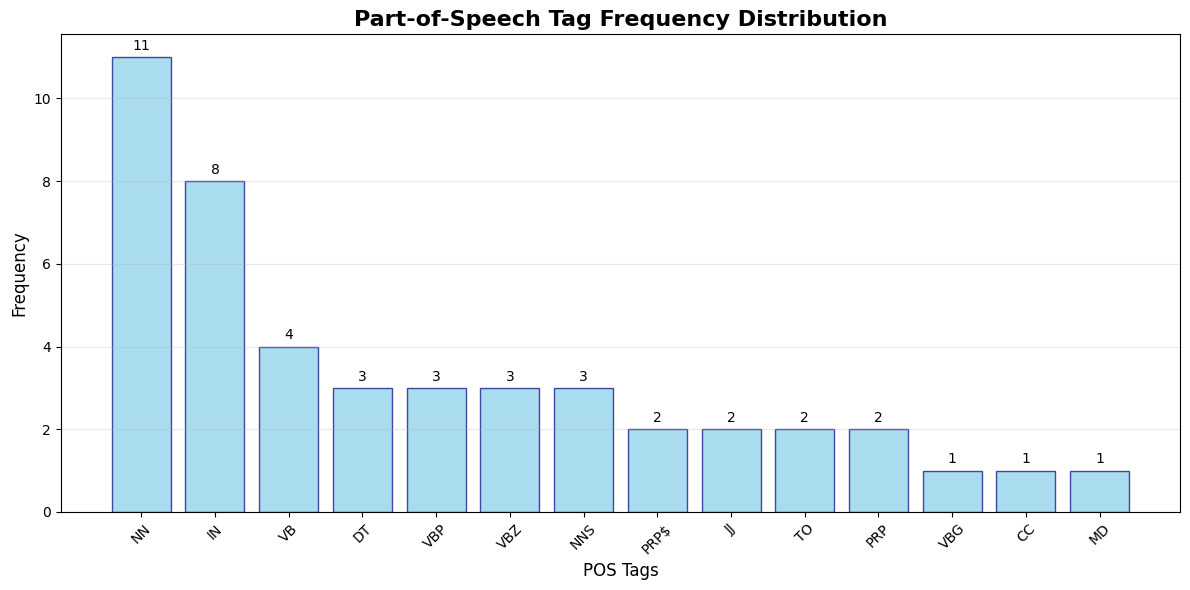


Detailed POS Analysis:
Nouns (14): ['woman', 'walks', 'bench', 'i', 'dog', 'part', 'part', 'buick', 'stops', 'i', 'smile', 'course', 'i', 'waltz']
Verbs (11): ['m', 'sitting', 'looks', 'asks', 'like', 'dance', 'tell', 'do', 'decide', 'begins', 'hum']
Adjectives (2): ['lab', 'i']
Adverbs (0): []


In [6]:
print(f"\n{'='*60}")
print("PART 5: POS TAGGING")
print(f"{'='*60}")

import nltk
nltk.download('averaged_perceptron_tagger_eng') # Download the specific English tagger

# POS tagging on original words (before stopword removal for better context)
pos_tags = pos_tag(words)
print(f"POS Tags for first 15 words:")
for word, tag in pos_tags[:15]:
    print(f"{word:<12} -> {tag}")

# Count POS tag frequencies
pos_counts = Counter([tag for word, tag in pos_tags])
print(f"\nPOS Tag Frequencies:")
for tag, count in pos_counts.most_common():
    print(f"{tag}: {count}")

# Create visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
tags, counts = zip(*pos_counts.most_common())
plt.bar(tags, counts, color='skyblue', edgecolor='navy', alpha=0.7)
plt.title('Part-of-Speech Tag Frequency Distribution', fontsize=16, fontweight='bold')
plt.xlabel('POS Tags', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (tag, count) in enumerate(pos_counts.most_common()):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Analyze specific POS categories
print(f"\nDetailed POS Analysis:")
nouns = [word for word, tag in pos_tags if tag.startswith('N')]
verbs = [word for word, tag in pos_tags if tag.startswith('V')]
adjectives = [word for word, tag in pos_tags if tag.startswith('J')]
adverbs = [word for word, tag in pos_tags if tag.startswith('R')]

print(f"Nouns ({len(nouns)}): {nouns}")
print(f"Verbs ({len(verbs)}): {verbs}")
print(f"Adjectives ({len(adjectives)}): {adjectives}")
print(f"Adverbs ({len(adverbs)}): {adverbs}")

# PART 6: NAMED ENTITY RECOGNITION (NER)


PART 6: NAMED ENTITY RECOGNITION (NER)
Named Entities Found:
Entity          Label      Description
--------------------------------------------------
Buick           PERSON     People, including fictional


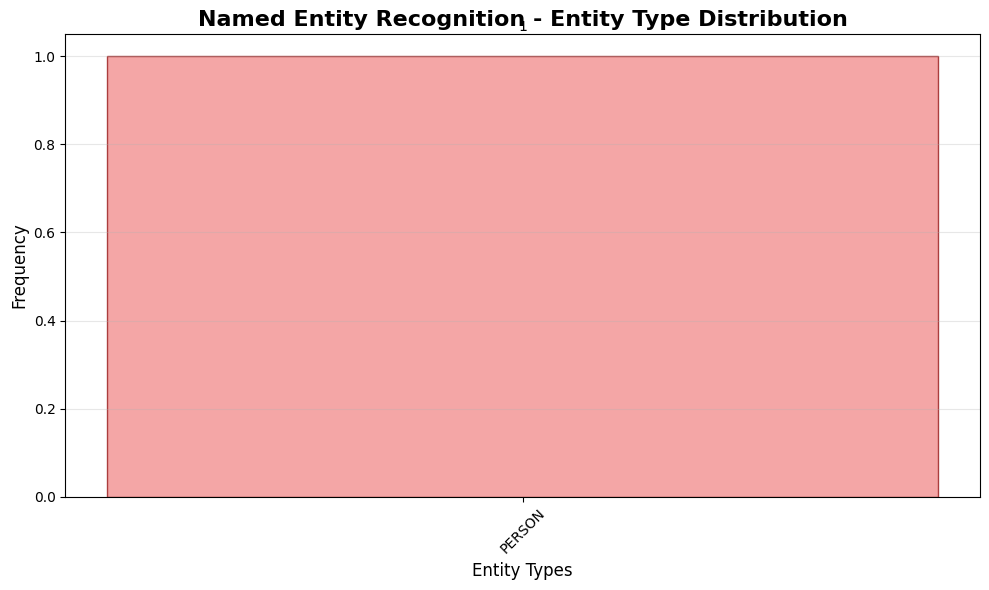


Named Entities from All Poems:
Entity type distribution across all poems:
DATE: 5 (Absolute or relative dates or periods)
ORG: 3 (Companies, agencies, institutions, etc.)
PERSON: 2 (People, including fictional)
CARDINAL: 2 (Numerals that do not fall under another type)
WORK_OF_ART: 2 (Titles of books, songs, etc.)
ORDINAL: 1 ("first", "second", etc.)
GPE: 1 (Countries, cities, states)

PERSON entities: ['Buick', 'Shall']

DATE entities: ["last summer's", 'today', 'This day', 'Five years', 'the middle of October']

ORG entities: ['Big Bend', 'Hills', 'Vales']

ORDINAL entities: ['first']

GPE entities: ['Loeda']

CARDINAL entities: ['five']

WORK_OF_ART entities: ['Beside the Lake', 'golden Daffodils']


In [7]:
print(f"\n{'='*60}")
print("PART 6: NAMED ENTITY RECOGNITION (NER)")
print(f"{'='*60}")

# Process with spaCy for NER
doc = nlp(original_text)

# Extract named entities
entities = [(ent.text, ent.label_, ent.start_char, ent.end_char) for ent in doc.ents]

if entities:
    print("Named Entities Found:")
    print(f"{'Entity':<15} {'Label':<10} {'Description'}")
    print("-" * 50)

    entity_counts = Counter()
    for text, label, start, end in entities:
        desc = spacy.explain(label)
        print(f"{text:<15} {label:<10} {desc}")
        entity_counts[label] += 1

    # Visualize entity distribution
    if entity_counts:
        plt.figure(figsize=(10, 6))
        labels, counts = zip(*entity_counts.most_common())
        plt.bar(labels, counts, color='lightcoral', edgecolor='darkred', alpha=0.7)
        plt.title('Named Entity Recognition - Entity Type Distribution', fontsize=16, fontweight='bold')
        plt.xlabel('Entity Types', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.xticks(rotation=45)
        plt.grid(axis='y', alpha=0.3)

        for i, (label, count) in enumerate(entity_counts.most_common()):
            plt.text(i, count + 0.05, str(count), ha='center', va='bottom')

        plt.tight_layout()
        plt.show()
else:
    print("No named entities found in this poem.")

# Analyze a longer text by combining multiple poems
all_poems_text = " ".join(df['Poem'].tolist())
doc_all = nlp(all_poems_text)
all_entities = [(ent.text, ent.label_) for ent in doc_all.ents]

if all_entities:
    print(f"\nNamed Entities from All Poems:")
    all_entity_counts = Counter([label for text, label in all_entities])

    print(f"Entity type distribution across all poems:")
    for label, count in all_entity_counts.most_common():
        print(f"{label}: {count} ({spacy.explain(label)})")

    # Show specific entities by type
    entity_by_type = {}
    for text, label in all_entities:
        if label not in entity_by_type:
            entity_by_type[label] = []
        entity_by_type[label].append(text)

    for label, entities_list in entity_by_type.items():
        unique_entities = list(set(entities_list))
        print(f"\n{label} entities: {unique_entities[:10]}")  # Show first 10

# COMPREHENSIVE ANALYSIS ACROSS ALL POEMS


COMPREHENSIVE ANALYSIS ACROSS ALL POEMS BY GENRE

Genre Comparison Summary:
            word_count unique_words words_after_stopwords entity_count
Music              169          121                    82            5
Death              118           91                    60            2
Affection           68           55                    37            2
Environment         67           53                    36            7


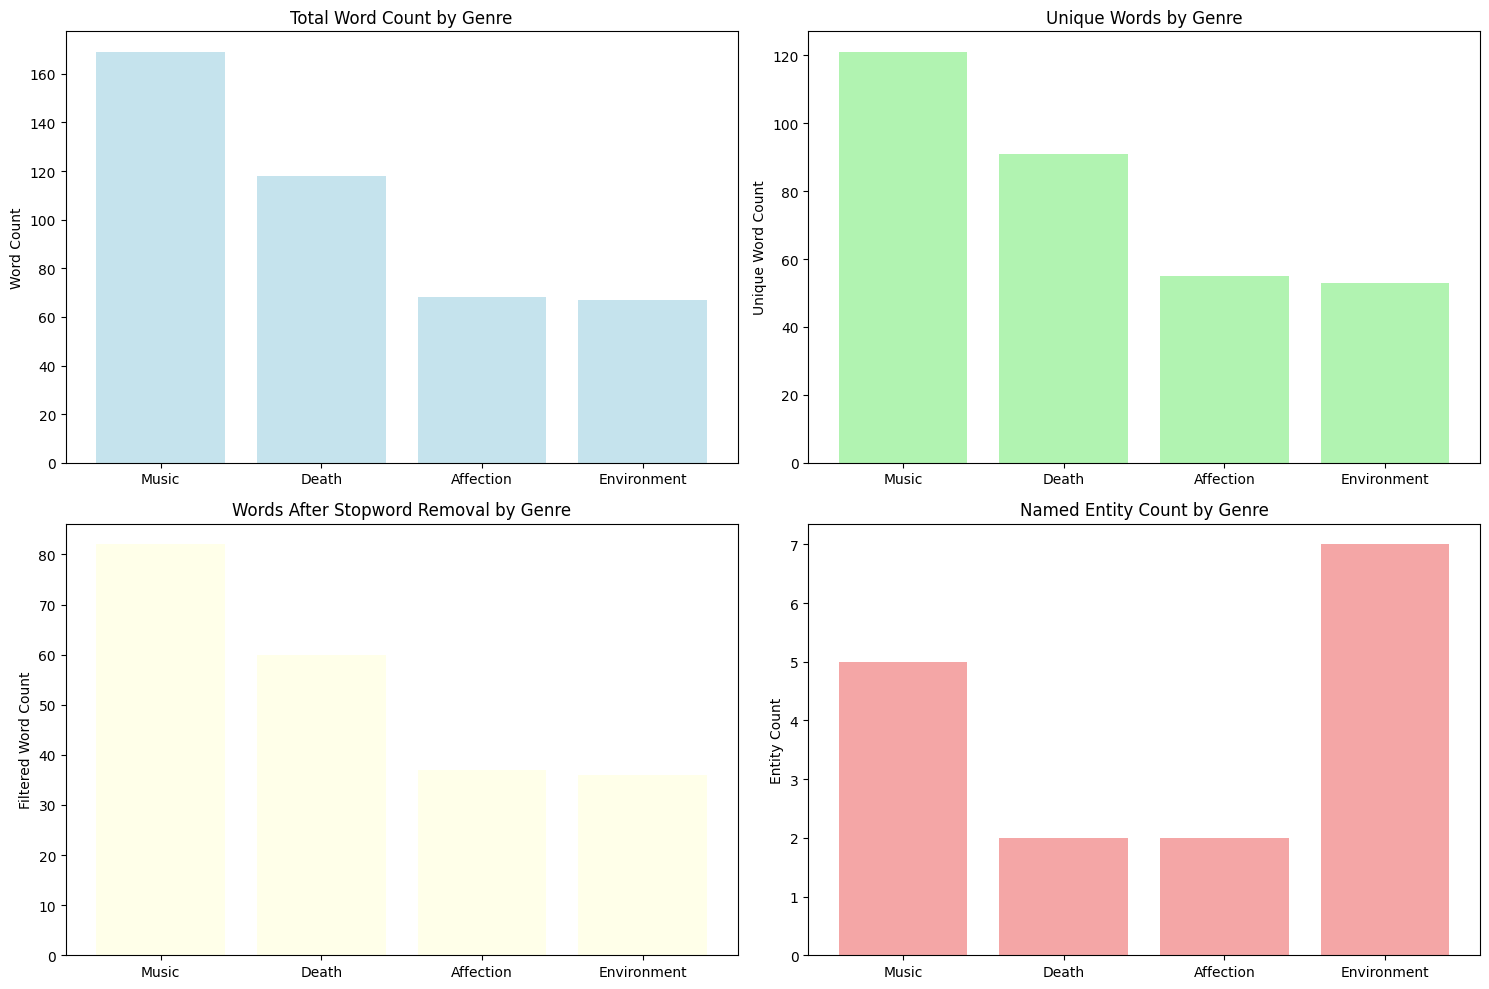


ANALYSIS COMPLETE
Summary of techniques demonstrated:
✓ Text cleaning (lowercase, punctuation removal, digit removal)
✓ Tokenization (sentences and words)
✓ Stopword removal with statistical analysis
✓ Stemming vs Lemmatization comparison
✓ Part-of-Speech tagging with visualization
✓ Named Entity Recognition across genres
✓ Comprehensive genre-based analysis
✓ Multiple visualization techniques


In [8]:
print(f"\n{'='*60}")
print("COMPREHENSIVE ANALYSIS ACROSS ALL POEMS BY GENRE")
print(f"{'='*60}")

# Analyze each genre
genre_analysis = {}

for genre in df['Genre'].unique():
    genre_poems = df[df['Genre'] == genre]['Poem'].tolist()
    combined_text = " ".join(genre_poems)
    cleaned_combined = clean_text(combined_text)

    # Tokenize using spaCy and remove stopwords
    doc = nlp(cleaned_combined)
    words = [token.text for token in doc]
    words_no_stop = [word for word in words if word not in stop_words]


    # POS tagging using NLTK (on original words for context)
    # Ensure 'averaged_perceptron_tagger' is downloaded if not already
    # nltk.download('averaged_perceptron_tagger', quiet=True) # Already downloaded in first cell
    pos_tags = pos_tag(words)
    pos_counts = Counter([tag for word, tag in pos_tags])

    # NER using spaCy
    doc_ner = nlp(combined_text) # Use original combined text for NER
    entities = [(ent.text, ent.label_) for ent in doc_ner.ents]
    entity_counts = Counter([label for text, label in entities])

    genre_analysis[genre] = {
        'word_count': len(words),
        'unique_words': len(set(words)),
        'words_after_stopwords': len(words_no_stop),
        'pos_distribution': dict(pos_counts.most_common(5)),
        'entity_count': len(entities),
        'entity_types': dict(entity_counts)
    }

# Display genre comparison
comparison_df = pd.DataFrame(genre_analysis).T
print("\nGenre Comparison Summary:")
print(comparison_df[['word_count', 'unique_words', 'words_after_stopwords', 'entity_count']])

# Visualize genre comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Word count comparison
genres = list(genre_analysis.keys())
word_counts = [genre_analysis[g]['word_count'] for g in genres]
axes[0,0].bar(genres, word_counts, color='lightblue', alpha=0.7)
axes[0,0].set_title('Total Word Count by Genre')
axes[0,0].set_ylabel('Word Count')

# Unique words comparison
unique_counts = [genre_analysis[g]['unique_words'] for g in genres]
axes[0,1].bar(genres, unique_counts, color='lightgreen', alpha=0.7)
axes[0,1].set_title('Unique Words by Genre')
axes[0,1].set_ylabel('Unique Word Count')

# Words after stopword removal
filtered_counts = [genre_analysis[g]['words_after_stopwords'] for g in genres]
axes[1,0].bar(genres, filtered_counts, color='lightyellow', alpha=0.7)
axes[1,0].set_title('Words After Stopword Removal by Genre')
axes[1,0].set_ylabel('Filtered Word Count')

# Entity count comparison
entity_counts = [genre_analysis[g]['entity_count'] for g in genres]
axes[1,1].bar(genres, entity_counts, color='lightcoral', alpha=0.7)
axes[1,1].set_title('Named Entity Count by Genre')
axes[1,1].set_ylabel('Entity Count')

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print("ANALYSIS COMPLETE")
print(f"{'='*60}")
print("Summary of techniques demonstrated:")
print("✓ Text cleaning (lowercase, punctuation removal, digit removal)")
print("✓ Tokenization (sentences and words)")
print("✓ Stopword removal with statistical analysis")
print("✓ Stemming vs Lemmatization comparison")
print("✓ Part-of-Speech tagging with visualization")
print("✓ Named Entity Recognition across genres")
print("✓ Comprehensive genre-based analysis")
print("✓ Multiple visualization techniques")